In [1]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Data without Cleaning

In [55]:
data=pd.read_csv(r"C:\Users\kiran\Documents\KIRAN\files_inno\EDA_dataset\dataset.csv")
data

,Vechicle Name,Model,Buy_Year,Location,Price,Engine_CC,No_of_owners,KM runs
0,['Royal '],Royal Enfield Thunderbird 350,2019.0,"Chennai, Tamil Nadu","['1,20,000']",340,Single,"32,000"
1,['Royal '],Royal Enfield Thunderbird TwinSpark 350,2009.0,"Banashankari, Bangalore, Karnataka","['80,000']",340,Single,"34,700"
2,['Bajaj '],Bajaj Pulsar NS 125,2025.0,"Faridabad, Haryana",NaN,125 cc,Single,"2,100"
3,['Hero '],Hero Electric Photon,2022.0,"Pharenda, Maharajganj, Uttar Pradesh","['80,000']",105 cc,Single,"23,000"
4,['Ola '],Ola S1 Pro,2022.0,"Thumkunta, Medchal-Malkajgiri, Telangana","['80,000']",Not Applicable,Single,"24,000"
...,...,...,...,...,...,...,...,...
820,['Hero '],Hero CD 100,1999.0,"Vadodara, Gujarat","['10,000']",105 cc,Single,"40,000"
821,['Jawa '],Jawa forty two,2022.0,"New Delhi, Delhi","['1,10,000']",300 cc,Single,"10,250"
822,['Jawa '],Jawa 42 Dual Channel ABS AllStar Black,2021.0,"Pune, Maharashtra","['1,65,000']",300 cc,Single,"6,700"
823,['Suzuki '],Suzuki Gixxer 150,2016.0,"Kozhikode, Kerala",NaN,110 cc,No of,"1,01,800"


## Checking the null values

In [56]:
data.isnull().sum()

Vechicle Name     0
Model             0
Buy_Year         15
Location          0
Price            97
Engine_CC        19
No_of_owners      0
KM runs          14
dtype: int64

In [57]:
data.duplicated().sum()

np.int64(26)

In [58]:
def extract_engine_cc(row):
    model = str(row["Model"])
    current_cc = row["Engine_CC"]
    patterns=[r"\b(\d{3})[^a-z]\b",r"\b( \d{3} )\b",r"\b\w.+(\d{3})\b"]
    if pd.isna(current_cc):
        for i in patterns:
            match = re.search(i, model)
            if match:
                return f"{match.group(1)} cc"
    return current_cc

data["Engine_CC"] = data.apply(extract_engine_cc, axis=1)
print(f"Missing Engine_CC after filling: {data['Engine_CC'].isna().sum()}")

Missing Engine_CC after filling: 19


In [59]:
data

,Vechicle Name,Model,Buy_Year,Location,Price,Engine_CC,No_of_owners,KM runs
0,['Royal '],Royal Enfield Thunderbird 350,2019.0,"Chennai, Tamil Nadu","['1,20,000']",340,Single,"32,000"
1,['Royal '],Royal Enfield Thunderbird TwinSpark 350,2009.0,"Banashankari, Bangalore, Karnataka","['80,000']",340,Single,"34,700"
2,['Bajaj '],Bajaj Pulsar NS 125,2025.0,"Faridabad, Haryana",NaN,125 cc,Single,"2,100"
3,['Hero '],Hero Electric Photon,2022.0,"Pharenda, Maharajganj, Uttar Pradesh","['80,000']",105 cc,Single,"23,000"
4,['Ola '],Ola S1 Pro,2022.0,"Thumkunta, Medchal-Malkajgiri, Telangana","['80,000']",Not Applicable,Single,"24,000"
...,...,...,...,...,...,...,...,...
820,['Hero '],Hero CD 100,1999.0,"Vadodara, Gujarat","['10,000']",105 cc,Single,"40,000"
821,['Jawa '],Jawa forty two,2022.0,"New Delhi, Delhi","['1,10,000']",300 cc,Single,"10,250"
822,['Jawa '],Jawa 42 Dual Channel ABS AllStar Black,2021.0,"Pune, Maharashtra","['1,65,000']",300 cc,Single,"6,700"
823,['Suzuki '],Suzuki Gixxer 150,2016.0,"Kozhikode, Kerala",NaN,110 cc,No of,"1,01,800"


In [60]:

data['Buy_Year'] = data['Buy_Year'].astype(str).str.extract(r'(\d{4})')


In [61]:
data.isnull().sum()

Vechicle Name     0
Model             0
Buy_Year         15
Location          0
Price            97
Engine_CC        19
No_of_owners      0
KM runs          14
dtype: int64

In [63]:
data.loc[data['Model'].str.contains('jawa', case=False, na=False), 'Engine_CC'] = '300 cc'
data.loc[data['Model'].str.contains('Benelli ', case=False, na=False), 'Engine_CC'] = '400 cc'

In [64]:
data.loc[data['Model'].str.contains('activa', case=False, na=False), 'Engine_CC'] = '120 cc'
data.loc[data['Model'].str.contains('FZ', case=False, na=False), 'Engine_CC'] = '170 cc'
data.loc[data['Model'].str.contains('Gixxer', case=False, na=False), 'Engine_CC'] = '155 cc'
data.loc[data['Model'].str.contains('hero', case=False, na=False), 'Engine_CC'] = '105 cc'
data.loc[data['Model'].str.contains('Honda', case=False, na=False), 'Engine_CC'] = '110 cc'
data.loc[data['Model'].str.contains('Yamaha', case=False, na=False), 'Engine_CC'] = '200 cc'
data.loc[data['Model'].str.contains('TVS', case=False, na=False), 'Engine_CC'] = '100 cc'
data.loc[data['Model'].str.contains('suzuki', case=False, na=False), 'Engine_CC'] = '110 cc'
data.loc[data['Model'].str.contains('Yamaha Fazer FI V2', case=False, na=False), 'Engine_CC'] = '150 cc'
data.loc[data['Model'].str.contains('Ola', case=False, na=False), 'Engine_CC'] = 'Not Applicable'
data.loc[data['Model'].str.contains('Bicycle', case=False, na=False), 'Engine_CC'] = 'Not Applicable'
data.loc[data['Model'].str.contains('Bajaj Chetak', case=False, na=False), 'Engine_CC'] = 'Not Applicable'
data.loc[data['Model'].str.contains('Harley', case=False, na=False), 'Engine_CC'] = '440 cc'
data.loc[data['Model'].str.contains('Royal Enfield ', case=False, na=False), 'Engine_CC'] = '340'
data.loc[data['Model'].str.contains('Bajaj Pulsar 135LS', case=False, na=False), 'Engine_CC'] = '340'
data.loc[data['Model'].str.contains('Yezdi ', case=False, na=False), 'Engine_CC'] = '340'
data.loc[data['Model'].str.contains('Bajaj v15', case=False, na=False), 'Engine_CC'] = '155 cc'
data.loc[data['Model'].str.contains('Ather Rizta Z', case=False, na=False), 'Engine_CC'] = 'Not Applicable'


In [65]:
data

,Vechicle Name,Model,Buy_Year,Location,Price,Engine_CC,No_of_owners,KM runs
0,['Royal '],Royal Enfield Thunderbird 350,2019,"Chennai, Tamil Nadu","['1,20,000']",340,Single,"32,000"
1,['Royal '],Royal Enfield Thunderbird TwinSpark 350,2009,"Banashankari, Bangalore, Karnataka","['80,000']",340,Single,"34,700"
2,['Bajaj '],Bajaj Pulsar NS 125,2025,"Faridabad, Haryana",NaN,125 cc,Single,"2,100"
3,['Hero '],Hero Electric Photon,2022,"Pharenda, Maharajganj, Uttar Pradesh","['80,000']",105 cc,Single,"23,000"
4,['Ola '],Ola S1 Pro,2022,"Thumkunta, Medchal-Malkajgiri, Telangana","['80,000']",Not Applicable,Single,"24,000"
...,...,...,...,...,...,...,...,...
820,['Hero '],Hero CD 100,1999,"Vadodara, Gujarat","['10,000']",105 cc,Single,"40,000"
821,['Jawa '],Jawa forty two,2022,"New Delhi, Delhi","['1,10,000']",300 cc,Single,"10,250"
822,['Jawa '],Jawa 42 Dual Channel ABS AllStar Black,2021,"Pune, Maharashtra","['1,65,000']",300 cc,Single,"6,700"
823,['Suzuki '],Suzuki Gixxer 150,2016,"Kozhikode, Kerala",NaN,110 cc,No of,"1,01,800"


In [66]:
#data["Price"].apply(lambda x:x[0] if isinstance(x,list) and len(x)>0 else None)

In [67]:
# # Remove [] if the cell contains a list and get the first value
# data['Price'] = data['Price'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)
# data['Vechicle Name'] = data['Vechicle Name'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)


In [68]:
# data['Price'] = data['Price'].str.strip()
# data['Vechicle Name'] = data['Vechicle Name'].str.strip()


In [69]:
data['Price'] = data['Price'].astype(str).str.replace(r"[\[\]']", '', regex=True)
data['Vechicle Name'] = data['Vechicle Name'].astype(str).str.replace(r"[\[\]']", '', regex=True)


In [70]:
data[['City', 'State']] = data['Location'].str.split(',', n=1, expand=True)
data["State"]=data["State"].str.strip()
data["City"]=data["City"].str.strip()

In [71]:
data[["Village","State"]]=data["State"].str.split(',',n=1,expand=True)
data["State"]=data["State"].str.strip()

In [72]:
#data.drop("Location",axis=1,inplace=True)
data.loc[data['State'].isna(), 'State'] = data.loc[data['State'].isna(), 'Village']
data.drop("Village",axis=1,inplace=True)

In [73]:
data.loc[data['State'].isna(), 'State'] = data.loc[data['State'].isna(), 'City']

In [74]:
data

,Vechicle Name,Model,Buy_Year,Location,Price,Engine_CC,No_of_owners,KM runs,City,State
0,Royal,Royal Enfield Thunderbird 350,2019,"Chennai, Tamil Nadu","1,20,000",340,Single,"32,000",Chennai,Tamil Nadu
1,Royal,Royal Enfield Thunderbird TwinSpark 350,2009,"Banashankari, Bangalore, Karnataka","80,000",340,Single,"34,700",Banashankari,Karnataka
2,Bajaj,Bajaj Pulsar NS 125,2025,"Faridabad, Haryana",nan,125 cc,Single,"2,100",Faridabad,Haryana
3,Hero,Hero Electric Photon,2022,"Pharenda, Maharajganj, Uttar Pradesh","80,000",105 cc,Single,"23,000",Pharenda,Uttar Pradesh
4,Ola,Ola S1 Pro,2022,"Thumkunta, Medchal-Malkajgiri, Telangana","80,000",Not Applicable,Single,"24,000",Thumkunta,Telangana
...,...,...,...,...,...,...,...,...,...,...
820,Hero,Hero CD 100,1999,"Vadodara, Gujarat","10,000",105 cc,Single,"40,000",Vadodara,Gujarat
821,Jawa,Jawa forty two,2022,"New Delhi, Delhi","1,10,000",300 cc,Single,"10,250",New Delhi,Delhi
822,Jawa,Jawa 42 Dual Channel ABS AllStar Black,2021,"Pune, Maharashtra","1,65,000",300 cc,Single,"6,700",Pune,Maharashtra
823,Suzuki,Suzuki Gixxer 150,2016,"Kozhikode, Kerala",nan,110 cc,No of,"1,01,800",Kozhikode,Kerala


In [75]:
data["Buy_Year"].fillna(value="Not Provided",inplace=True)
data["Engine_CC"]=data["Engine_CC"].fillna("Not Provided")
data.isnull().sum()

C:\Users\kiran\AppData\Local\Temp\ipykernel_21728\934658100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Buy_Year"].fillna(value="Not Provided",inplace=True)


Vechicle Name     0
Model             0
Buy_Year          0
Location          0
Price             0
Engine_CC         0
No_of_owners      0
KM runs          14
City              0
State             0
dtype: int64

In [76]:
data["KM runs"]=data["KM runs"].str.replace(',','')

In [77]:
data["KM runs"]=data["KM runs"].astype(float)

In [78]:
data["KM runs"]=data["KM runs"].fillna(data["KM runs"].median())

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Vechicle Name  825 non-null    object 
 1   Model          825 non-null    object 
 2   Buy_Year       825 non-null    object 
 3   Location       825 non-null    object 
 4   Price          825 non-null    object 
 5   Engine_CC      825 non-null    object 
 6   No_of_owners   825 non-null    object 
 7   KM runs        825 non-null    float64
 8   City           825 non-null    object 
 9   State          825 non-null    object 
dtypes: float64(1), object(9)
memory usage: 64.6+ KB


In [80]:
data["Price"]=data["Price"].str.replace(',','')

In [81]:
data["Price"]=data["Price"].astype(float)

In [82]:
#filler=data.groupby(["Model"])["Price"].mean()
data[data["Model"].str.contains("Bajaj")]["Price"].mean()

np.float64(69208.0)

In [83]:
# data.groupby(["Engine_CC"])["Price"].mean()

In [84]:
data.loc[data["Model"].str.contains("M16", case=False, na=False),"Price"]=200000
data.loc[data["Model"].str.contains("Ampere Nexus ST", case=False, na=False),"Price"]=130000


In [85]:
# data.loc[data["Price"].isna(),'Model']=data[data["Model"].str.contains("Bajaj")]["Price"].mean()

In [86]:
data[data["Model"]=="Bajaj Pulsar NS 125"]["Price"].mode(1)

0    80000.0
1    95000.0
Name: Price, dtype: float64

In [87]:
data["Price"].bfill(inplace=True)

C:\Users\kiran\AppData\Local\Temp\ipykernel_21728\2391903652.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Price"].bfill(inplace=True)


In [88]:
data

,Vechicle Name,Model,Buy_Year,Location,Price,Engine_CC,No_of_owners,KM runs,City,State
0,Royal,Royal Enfield Thunderbird 350,2019,"Chennai, Tamil Nadu",120000.0,340,Single,32000.0,Chennai,Tamil Nadu
1,Royal,Royal Enfield Thunderbird TwinSpark 350,2009,"Banashankari, Bangalore, Karnataka",80000.0,340,Single,34700.0,Banashankari,Karnataka
2,Bajaj,Bajaj Pulsar NS 125,2025,"Faridabad, Haryana",80000.0,125 cc,Single,2100.0,Faridabad,Haryana
3,Hero,Hero Electric Photon,2022,"Pharenda, Maharajganj, Uttar Pradesh",80000.0,105 cc,Single,23000.0,Pharenda,Uttar Pradesh
4,Ola,Ola S1 Pro,2022,"Thumkunta, Medchal-Malkajgiri, Telangana",80000.0,Not Applicable,Single,24000.0,Thumkunta,Telangana
...,...,...,...,...,...,...,...,...,...,...
820,Hero,Hero CD 100,1999,"Vadodara, Gujarat",10000.0,105 cc,Single,40000.0,Vadodara,Gujarat
821,Jawa,Jawa forty two,2022,"New Delhi, Delhi",110000.0,300 cc,Single,10250.0,New Delhi,Delhi
822,Jawa,Jawa 42 Dual Channel ABS AllStar Black,2021,"Pune, Maharashtra",165000.0,300 cc,Single,6700.0,Pune,Maharashtra
823,Suzuki,Suzuki Gixxer 150,2016,"Kozhikode, Kerala",60000.0,110 cc,No of,101800.0,Kozhikode,Kerala


In [89]:
data["No_of_owners"].value_counts()

No_of_owners
Single    787
No of      38
Name: count, dtype: int64

In [90]:
data["No_of_owners"]=data["No_of_owners"].str.replace("No of","Multiple")

In [91]:
# data.groupby("Model")["Buy_Year"]

In [92]:
data["Vehicle_Type"]=np.where(data["Engine_CC"]=="Not Applicable","Electrical_Vehicle","Manual_Vehicle")

In [93]:
data['Engine_CC'] = data['Engine_CC'].replace('', np.nan)


In [94]:
data[data["Vehicle_Type"]=="Electrical_Vehicle"].shape

(41, 11)

In [95]:
data[data["Engine_CC"]==np.nan]

,Vechicle Name,Model,Buy_Year,Location,Price,Engine_CC,No_of_owners,KM runs,City,State,Vehicle_Type


In [96]:
data

,Vechicle Name,Model,Buy_Year,Location,Price,Engine_CC,No_of_owners,KM runs,City,State,Vehicle_Type
0,Royal,Royal Enfield Thunderbird 350,2019,"Chennai, Tamil Nadu",120000.0,340,Single,32000.0,Chennai,Tamil Nadu,Manual_Vehicle
1,Royal,Royal Enfield Thunderbird TwinSpark 350,2009,"Banashankari, Bangalore, Karnataka",80000.0,340,Single,34700.0,Banashankari,Karnataka,Manual_Vehicle
2,Bajaj,Bajaj Pulsar NS 125,2025,"Faridabad, Haryana",80000.0,125 cc,Single,2100.0,Faridabad,Haryana,Manual_Vehicle
3,Hero,Hero Electric Photon,2022,"Pharenda, Maharajganj, Uttar Pradesh",80000.0,105 cc,Single,23000.0,Pharenda,Uttar Pradesh,Manual_Vehicle
4,Ola,Ola S1 Pro,2022,"Thumkunta, Medchal-Malkajgiri, Telangana",80000.0,Not Applicable,Single,24000.0,Thumkunta,Telangana,Electrical_Vehicle
...,...,...,...,...,...,...,...,...,...,...,...
820,Hero,Hero CD 100,1999,"Vadodara, Gujarat",10000.0,105 cc,Single,40000.0,Vadodara,Gujarat,Manual_Vehicle
821,Jawa,Jawa forty two,2022,"New Delhi, Delhi",110000.0,300 cc,Single,10250.0,New Delhi,Delhi,Manual_Vehicle
822,Jawa,Jawa 42 Dual Channel ABS AllStar Black,2021,"Pune, Maharashtra",165000.0,300 cc,Single,6700.0,Pune,Maharashtra,Manual_Vehicle
823,Suzuki,Suzuki Gixxer 150,2016,"Kozhikode, Kerala",60000.0,110 cc,Multiple,101800.0,Kozhikode,Kerala,Manual_Vehicle


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Vechicle Name  825 non-null    object 
 1   Model          825 non-null    object 
 2   Buy_Year       825 non-null    object 
 3   Location       825 non-null    object 
 4   Price          825 non-null    float64
 5   Engine_CC      825 non-null    object 
 6   No_of_owners   825 non-null    object 
 7   KM runs        825 non-null    float64
 8   City           825 non-null    object 
 9   State          825 non-null    object 
 10  Vehicle_Type   825 non-null    object 
dtypes: float64(2), object(9)
memory usage: 71.0+ KB


In [98]:
data["Buy_Year"]=data["Buy_Year"].replace("Not Provided",np.nan)

In [99]:

overall_mode = data['Buy_Year'].mode().iloc[0]

data['Buy_Year'] = data['Buy_Year'].fillna(
    data.groupby('Model')['Buy_Year'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else overall_mode)
)


In [100]:
data["Buy_Year"]=data["Buy_Year"].astype(int)
data["Price"]=data["Price"].astype(int)
data["KM runs"]=data["KM runs"].astype(int)
data

,Vechicle Name,Model,Buy_Year,Location,Price,Engine_CC,No_of_owners,KM runs,City,State,Vehicle_Type
0,Royal,Royal Enfield Thunderbird 350,2019,"Chennai, Tamil Nadu",120000,340,Single,32000,Chennai,Tamil Nadu,Manual_Vehicle
1,Royal,Royal Enfield Thunderbird TwinSpark 350,2009,"Banashankari, Bangalore, Karnataka",80000,340,Single,34700,Banashankari,Karnataka,Manual_Vehicle
2,Bajaj,Bajaj Pulsar NS 125,2025,"Faridabad, Haryana",80000,125 cc,Single,2100,Faridabad,Haryana,Manual_Vehicle
3,Hero,Hero Electric Photon,2022,"Pharenda, Maharajganj, Uttar Pradesh",80000,105 cc,Single,23000,Pharenda,Uttar Pradesh,Manual_Vehicle
4,Ola,Ola S1 Pro,2022,"Thumkunta, Medchal-Malkajgiri, Telangana",80000,Not Applicable,Single,24000,Thumkunta,Telangana,Electrical_Vehicle
...,...,...,...,...,...,...,...,...,...,...,...
820,Hero,Hero CD 100,1999,"Vadodara, Gujarat",10000,105 cc,Single,40000,Vadodara,Gujarat,Manual_Vehicle
821,Jawa,Jawa forty two,2022,"New Delhi, Delhi",110000,300 cc,Single,10250,New Delhi,Delhi,Manual_Vehicle
822,Jawa,Jawa 42 Dual Channel ABS AllStar Black,2021,"Pune, Maharashtra",165000,300 cc,Single,6700,Pune,Maharashtra,Manual_Vehicle
823,Suzuki,Suzuki Gixxer 150,2016,"Kozhikode, Kerala",60000,110 cc,Multiple,101800,Kozhikode,Kerala,Manual_Vehicle


In [101]:
data.drop("Location",axis=1,inplace=True)

In [102]:
data

,Vechicle Name,Model,Buy_Year,Price,Engine_CC,No_of_owners,KM runs,City,State,Vehicle_Type
0,Royal,Royal Enfield Thunderbird 350,2019,120000,340,Single,32000,Chennai,Tamil Nadu,Manual_Vehicle
1,Royal,Royal Enfield Thunderbird TwinSpark 350,2009,80000,340,Single,34700,Banashankari,Karnataka,Manual_Vehicle
2,Bajaj,Bajaj Pulsar NS 125,2025,80000,125 cc,Single,2100,Faridabad,Haryana,Manual_Vehicle
3,Hero,Hero Electric Photon,2022,80000,105 cc,Single,23000,Pharenda,Uttar Pradesh,Manual_Vehicle
4,Ola,Ola S1 Pro,2022,80000,Not Applicable,Single,24000,Thumkunta,Telangana,Electrical_Vehicle
...,...,...,...,...,...,...,...,...,...,...
820,Hero,Hero CD 100,1999,10000,105 cc,Single,40000,Vadodara,Gujarat,Manual_Vehicle
821,Jawa,Jawa forty two,2022,110000,300 cc,Single,10250,New Delhi,Delhi,Manual_Vehicle
822,Jawa,Jawa 42 Dual Channel ABS AllStar Black,2021,165000,300 cc,Single,6700,Pune,Maharashtra,Manual_Vehicle
823,Suzuki,Suzuki Gixxer 150,2016,60000,110 cc,Multiple,101800,Kozhikode,Kerala,Manual_Vehicle


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Vechicle Name  825 non-null    object
 1   Model          825 non-null    object
 2   Buy_Year       825 non-null    int64 
 3   Price          825 non-null    int64 
 4   Engine_CC      825 non-null    object
 5   No_of_owners   825 non-null    object
 6   KM runs        825 non-null    int64 
 7   City           825 non-null    object
 8   State          825 non-null    object
 9   Vehicle_Type   825 non-null    object
dtypes: int64(3), object(7)
memory usage: 64.6+ KB


In [104]:
data.duplicated().sum()

np.int64(26)

In [105]:
data.drop_duplicates()

,Vechicle Name,Model,Buy_Year,Price,Engine_CC,No_of_owners,KM runs,City,State,Vehicle_Type
0,Royal,Royal Enfield Thunderbird 350,2019,120000,340,Single,32000,Chennai,Tamil Nadu,Manual_Vehicle
1,Royal,Royal Enfield Thunderbird TwinSpark 350,2009,80000,340,Single,34700,Banashankari,Karnataka,Manual_Vehicle
2,Bajaj,Bajaj Pulsar NS 125,2025,80000,125 cc,Single,2100,Faridabad,Haryana,Manual_Vehicle
3,Hero,Hero Electric Photon,2022,80000,105 cc,Single,23000,Pharenda,Uttar Pradesh,Manual_Vehicle
4,Ola,Ola S1 Pro,2022,80000,Not Applicable,Single,24000,Thumkunta,Telangana,Electrical_Vehicle
...,...,...,...,...,...,...,...,...,...,...
820,Hero,Hero CD 100,1999,10000,105 cc,Single,40000,Vadodara,Gujarat,Manual_Vehicle
821,Jawa,Jawa forty two,2022,110000,300 cc,Single,10250,New Delhi,Delhi,Manual_Vehicle
822,Jawa,Jawa 42 Dual Channel ABS AllStar Black,2021,165000,300 cc,Single,6700,Pune,Maharashtra,Manual_Vehicle
823,Suzuki,Suzuki Gixxer 150,2016,60000,110 cc,Multiple,101800,Kozhikode,Kerala,Manual_Vehicle


In [106]:
data["Engine_CC"] =data["Engine_CC"].replace("Not Applicable", None)
data["Engine_CC"] = data["Engine_CC"].str.replace(" cc", "", regex=False)
data["Engine_CC"] = pd.to_numeric(data["Engine_CC"], errors="coerce")

In [107]:
data

,Vechicle Name,Model,Buy_Year,Price,Engine_CC,No_of_owners,KM runs,City,State,Vehicle_Type
0,Royal,Royal Enfield Thunderbird 350,2019,120000,340.0,Single,32000,Chennai,Tamil Nadu,Manual_Vehicle
1,Royal,Royal Enfield Thunderbird TwinSpark 350,2009,80000,340.0,Single,34700,Banashankari,Karnataka,Manual_Vehicle
2,Bajaj,Bajaj Pulsar NS 125,2025,80000,125.0,Single,2100,Faridabad,Haryana,Manual_Vehicle
3,Hero,Hero Electric Photon,2022,80000,105.0,Single,23000,Pharenda,Uttar Pradesh,Manual_Vehicle
4,Ola,Ola S1 Pro,2022,80000,NaN,Single,24000,Thumkunta,Telangana,Electrical_Vehicle
...,...,...,...,...,...,...,...,...,...,...
820,Hero,Hero CD 100,1999,10000,105.0,Single,40000,Vadodara,Gujarat,Manual_Vehicle
821,Jawa,Jawa forty two,2022,110000,300.0,Single,10250,New Delhi,Delhi,Manual_Vehicle
822,Jawa,Jawa 42 Dual Channel ABS AllStar Black,2021,165000,300.0,Single,6700,Pune,Maharashtra,Manual_Vehicle
823,Suzuki,Suzuki Gixxer 150,2016,60000,110.0,Multiple,101800,Kozhikode,Kerala,Manual_Vehicle


In [110]:
data.to_csv(r'C:\Users\kiran\Documents\KIRAN\files_inno\EDA_dataset\Cleaned_dataset.csv',index=False)

## Visualization

#### UniVariant Analysis(Numeric Data)

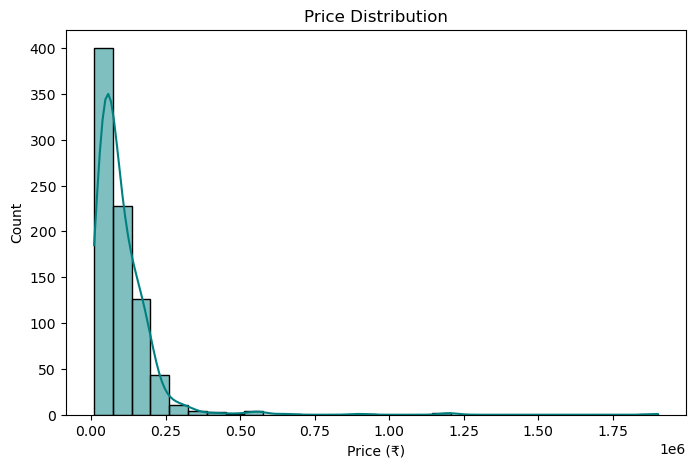

In [111]:
# Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(data["Price"], bins=30, kde=True, color="teal")
plt.title("Price Distribution")
plt.xlabel("Price (₹)")
plt.ylabel("Count")
plt.show()

In [112]:
price_range = (data["Price"].min(), data["Price"].max())
print(f"- Vehicle prices range from ₹{price_range[0]:,.0f} to ₹{price_range[1]:,.0f}.")

- Vehicle prices range from ₹10,000 to ₹1,900,000.


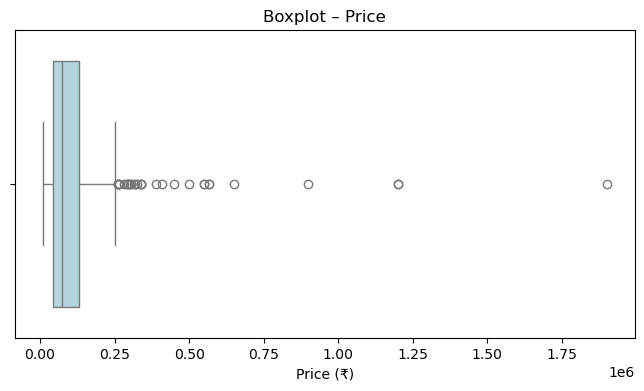

In [113]:

# Boxplot for Price
plt.figure(figsize=(8,4))
sns.boxplot(x=data["Price"], color="lightblue")
plt.title("Boxplot – Price")
plt.xlabel("Price (₹)")
plt.show()

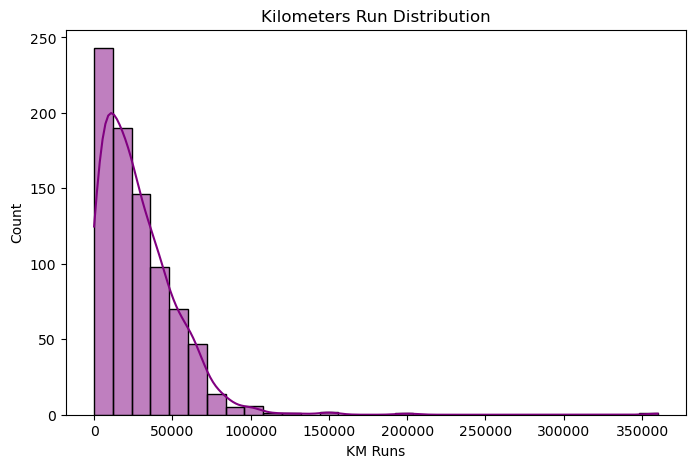

In [114]:
# KM Runs Distribution
plt.figure(figsize=(8,5))
sns.histplot(data["KM runs"], bins=30, kde=True, color="purple")
plt.title("Kilometers Run Distribution")
plt.xlabel("KM Runs")
plt.ylabel("Count")
plt.show()

In [136]:
km_range = (data["KM runs"].min(), data["KM runs"].max())
print(f"- Vehicles have run between {km_range[0]:,.0f} km and {km_range[1]:,.0f} km.\n")


- Vehicles have run between 5 km and 360,000 km.



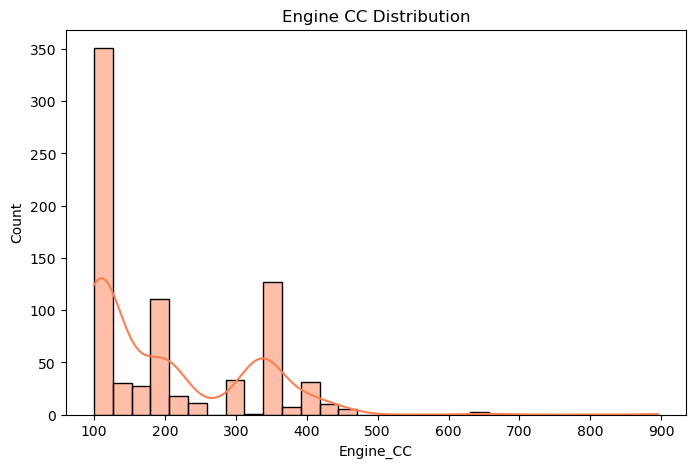

In [115]:
# Engine CC Distribution
plt.figure(figsize=(8,5))
sns.histplot(data["Engine_CC"].dropna(), bins=30, kde=True, color="coral")
plt.title("Engine CC Distribution")
plt.xlabel("Engine_CC")
plt.ylabel("Count")
plt.show()

In [135]:
engine_range = (data["Engine_CC"].min(), data["Engine_CC"].max())
print(f"- Engine capacities range from {engine_range[0]:,.0f} cc to {engine_range[1]:,.0f} cc.")

- Engine capacities range from 100 cc to 895 cc.


## UNIVARIATE ANALYSIS (Categorical)

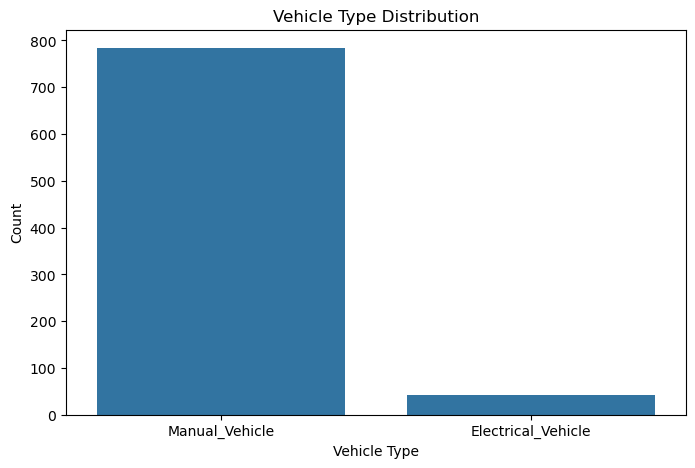

In [116]:
# Vehicle Type Distribution
plt.figure(figsize=(8,5))
sns.countplot(x="Vehicle_Type", data=data)
plt.title("Vehicle Type Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()

In [132]:
vehicle_type_counts = data["Vehicle_Type"].value_counts(normalize=True) * 100
print(f"- {vehicle_type_counts.idxmax()} vehicles dominate the dataset (~{vehicle_type_counts.max():.1f}%).")

- Manual_Vehicle vehicles dominate the dataset (~95.0%).


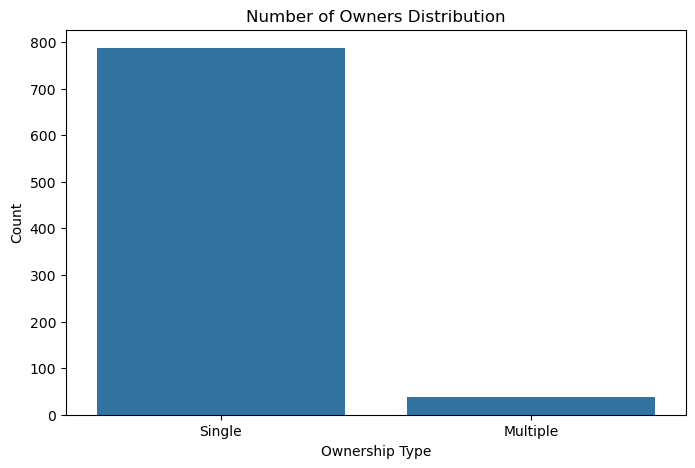

In [117]:
# Number of Owners Distribution
plt.figure(figsize=(8,5))
sns.countplot(x="No_of_owners", data=data, order=data["No_of_owners"].value_counts().index)
plt.title("Number of Owners Distribution")
plt.xlabel("Ownership Type")
plt.ylabel("Count")
plt.show()

In [134]:
owner_counts = data["No_of_owners"].value_counts(normalize=True) * 100
print(f"- Most vehicles are from {owner_counts.idxmax().lower()} owners (~{owner_counts.max():.1f}%).")

- Most vehicles are from single owners (~95.4%).


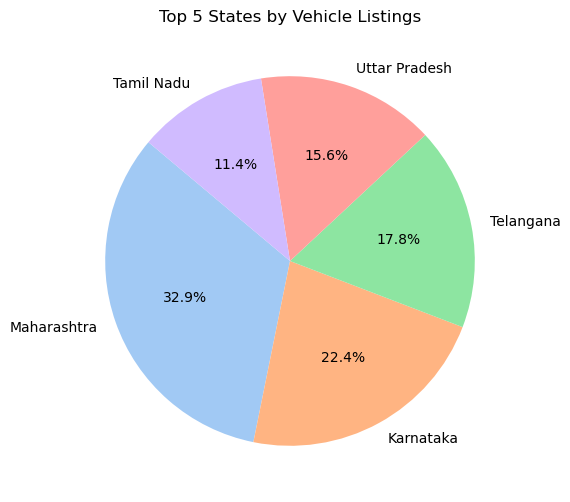

In [118]:
# Pie Chart – Top 5 States
plt.figure(figsize=(6,6))
data["State"].value_counts().head(5).plot.pie(
    autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel")
)
plt.title("Top 5 States by Vehicle Listings")
plt.ylabel("")
plt.show()

In [133]:
top_state_counts = data["State"].value_counts().head(3)
print(f"- Highest listings come from {', '.join(top_state_counts.index)}.\n")


- Highest listings come from Maharashtra, Karnataka, Telangana.



## BIVARIATE ANALYSIS (Continuous vs Continuous)

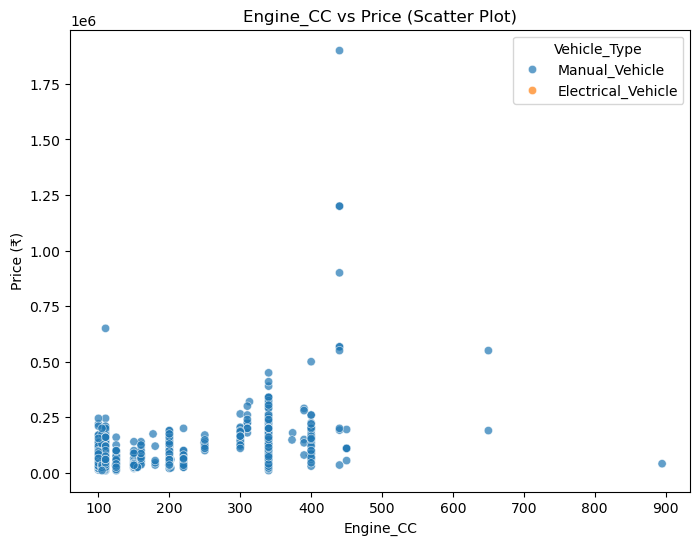

In [131]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Engine_CC", y="Price", data=data, hue="Vehicle_Type", alpha=0.7)
plt.title("Engine_CC vs Price (Scatter Plot)")
plt.xlabel("Engine_CC")
plt.ylabel("Price (₹)")
plt.show()

In [128]:
corr_engine_price = data["Engine_CC"].corr(data["Price"])
print("🔹 Bivariate (Continuous vs Continuous) Insight:")
print(f"- There is a positive correlation (r = {corr_engine_price:.2f}) between Engine_CC and Price.\n")


🔹 Bivariate (Continuous vs Continuous) Insight:
- There is a positive correlation (r = 0.46) between Engine_CC and Price.



## BIVARIATE ANALYSIS (Continuous vs Categorical)

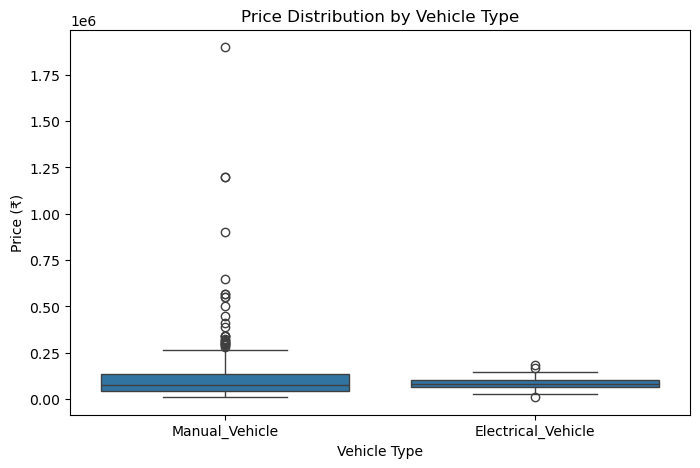

In [120]:
# Price vs Vehicle Type
plt.figure(figsize=(8,5))
sns.boxplot(x="Vehicle_Type", y="Price", data=data)
plt.title("Price Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Price (₹)")
plt.show()

In [127]:
price_by_vehicle_type = data.groupby("Vehicle_Type")["Price"].mean().sort_values(ascending=False)
price_by_owners = data.groupby("No_of_owners")["Price"].mean().sort_values(ascending=False)
print("🔹 Bivariate (Continuous vs Categorical) Insights:")
print(f"- The highest average price is for {price_by_vehicle_type.index[0]} vehicles (₹{price_by_vehicle_type.iloc[0]:,.0f}).")
print(f"- Vehicles with {price_by_owners.index[0].lower()} ownership have the highest resale price (₹{price_by_owners.iloc[0]:,.0f}).\n")

🔹 Bivariate (Continuous vs Categorical) Insights:
- The highest average price is for Manual_Vehicle vehicles (₹104,227).
- Vehicles with single ownership have the highest resale price (₹103,464).



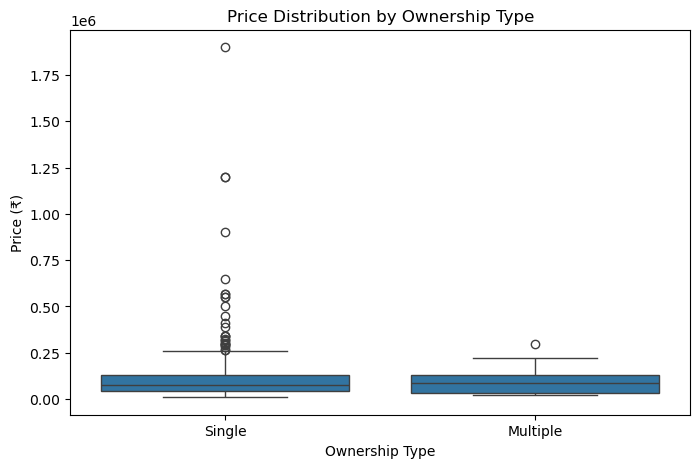

In [121]:
# Price vs Ownership Type
plt.figure(figsize=(8,5))
sns.boxplot(x="No_of_owners", y="Price", data=data, order=data["No_of_owners"].value_counts().index)
plt.title("Price Distribution by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Price (₹)")
plt.show()

## # Multivariate

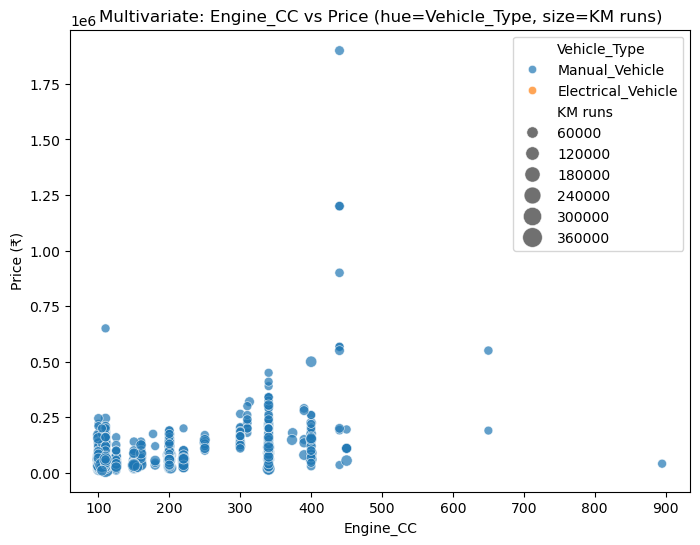

In [123]:
# Scatter Plot – Multivariate
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Engine_CC",
    y="Price",
    hue="Vehicle_Type",
    size="KM runs",
    sizes=(40,200),
    alpha=0.7,
    data=data
)
plt.title("Multivariate: Engine_CC vs Price (hue=Vehicle_Type, size=KM runs)")
plt.xlabel("Engine_CC")
plt.ylabel("Price (₹)")
plt.show()

In [125]:
corr_matrix = data[["Price", "Engine_CC", "KM runs", "Buy_Year"]].corr()
strongest_corr = corr_matrix["Price"].drop("Price").abs().idxmax()
print("🔹 Multivariate Insights:")
print(f"- The feature most strongly correlated with Price is '{strongest_corr}'.")
print("- Vehicles with higher engine capacity, fewer kilometers, and recent buy year tend to have higher prices.")

🔹 Multivariate Insights:
- The feature most strongly correlated with Price is 'Engine_CC'.
- Vehicles with higher engine capacity, fewer kilometers, and recent buy year tend to have higher prices.


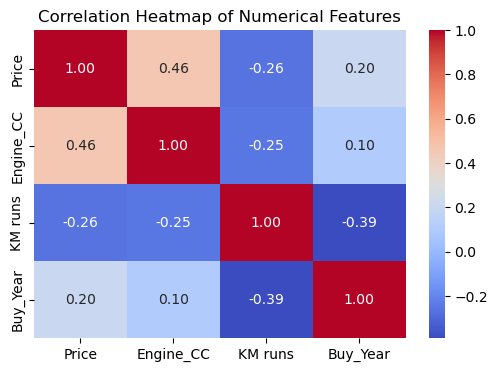

In [124]:
plt.figure(figsize=(6,4))
corr = data[["Price", "Engine_CC", "KM runs", "Buy_Year"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [137]:
print("The correlation heatmap reveals that engine capacity (Engine_CC) is the strongest determinant of price, followed by buy year, while mileage (KM runs) inversely impacts value — newer, powerful vehicles tend to have higher resale prices")

The correlation heatmap reveals that engine capacity (Engine_CC) is the strongest determinant of price, followed by buy year, while mileage (KM runs) inversely impacts value — newer, powerful vehicles tend to have higher resale prices


In [105]:
data

,Vechicle Name,Model,Buy_Year,Location,Price,Engine_CC,No_of_owners,KM runs
0,['Royal '],Royal Enfield Thunderbird 350,2019,"Chennai, Tamil Nadu","['1,20,000']",350 cc,Single,"32,000"
1,['Royal '],Royal Enfield Thunderbird TwinSpark 350,2009,"Banashankari, Bangalore, Karnataka","['80,000']",350 cc,Single,"34,700"
2,['Bajaj '],Bajaj Pulsar NS 125,2025,"Faridabad, Haryana",NaN,125 cc,Single,"2,100"
3,['Hero '],Hero Electric Photon,2022,"Pharenda, Maharajganj, Uttar Pradesh","['80,000']",105 cc,Single,"23,000"
4,['Ola '],Ola S1 Pro,2022,"Thumkunta, Medchal-Malkajgiri, Telangana","['80,000']",Not Applicable,Single,"24,000"
...,...,...,...,...,...,...,...,...
820,['Hero '],Hero CD 100,1999,"Vadodara, Gujarat","['10,000']",105 cc,Single,"40,000"
821,['Jawa '],Jawa forty two,2022,"New Delhi, Delhi","['1,10,000']",300 cc,Single,"10,250"
822,['Jawa '],Jawa 42 Dual Channel ABS AllStar Black,2021,"Pune, Maharashtra","['1,65,000']",300 cc,Single,"6,700"
823,['Suzuki '],Suzuki Gixxer 150,2016,"Kozhikode, Kerala",NaN,110 cc,No of,"1,01,800"


In [106]:
data.to_csv(r'C:\Users\kiran\Documents\KIRAN\files_inno\EDA_dataset\dataset.csv',index=False)